<a href="https://colab.research.google.com/github/Rashed17a/MScFE-610-GWP/blob/main/Dealing_with_the_Autocorrelation_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daily Returns Calculation:** The percentage change in adjusted closing prices of Nvidia stock is calculated to evaluate daily performance.

**ACF Plot:** The plot visualizes the autocorrelation of Nvidia's daily returns over 20 lags, helping detect patterns or randomness in the time series.

[*********************100%***********************]  1 of 1 completed


<Figure size 1000x600 with 0 Axes>

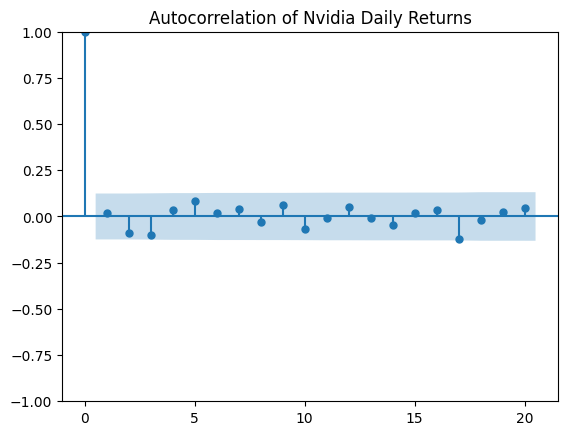

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Fetch Nvidia stock data
nvidia = yf.download('NVDA', start='2023-01-01', end='2024-01-01')

# Calculate daily returns
nvidia['Daily Returns'] = nvidia['Adj Close'].pct_change()
nvidia.dropna(inplace=True)

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(nvidia['Daily Returns'], lags=20, title="Autocorrelation of Nvidia Daily Returns")
plt.show()

**Residuals:** The difference between the actual daily returns and their mean is used as an example of residuals.

**Durbin-Watson Statistic:** The test statistic checks for autocorrelation in residuals:
* Values close to 2 indicate no autocorrelation.
* Values less than 2 suggest positive autocorrelation.
* Values greater than 2 suggest negative autocorrelation.

In [2]:
from statsmodels.stats.stattools import durbin_watson

# Residuals for example
residuals = nvidia['Daily Returns'] - nvidia['Daily Returns'].mean()
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson Statistic: {dw_stat:.4f}")

Durbin-Watson Statistic: 1.9572


**Differencing:**
* Removes trends or seasonality in time series data, making it stationary.
* The first-order differenced returns are calculated by subtracting consecutive daily returns.

**Autocorrelation Function (ACF):**
* Measures the correlation between a time series and its lagged values.
* Used to assess the reduction in autocorrelation after differencing.

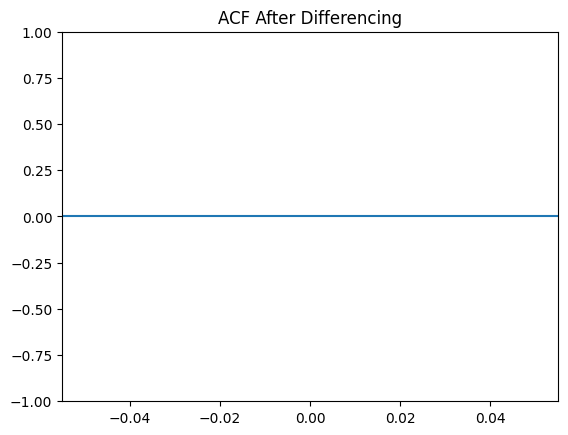

In [3]:
# Calculate differenced returns
nvidia['Differenced Returns'] = nvidia['Daily Returns'].diff().dropna()
# Plot ACF after differencing
plot_acf(nvidia['Differenced Returns'], lags=20, title="ACF After Differencing")
plt.show()

**ARIMA Model:**

* ARIMA(p, d, q):
1. p=1: Captures first-order autocorrelation.
2. d=1: Differencing to achieve stationarity.
3. q=0: No moving average component in this example.
* Models the relationship between a time series' past values and its residuals.

**Model Summary:**
* Provides coefficients, significance tests, and fit statistics for the ARIMA model.
* Includes metrics like AIC and BIC for model selection.

**Residual Analysis:**

* Residuals represent the portion of the time series not explained by the model.
* The ACF plot of residuals helps identify remaining patterns or autocorrelation.
* Ideally, residuals should appear uncorrelated (white noise).

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Daily Returns   No. Observations:                  249
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 457.121
Date:                Mon, 09 Dec 2024   AIC                           -910.242
Time:                        11:10:23   BIC                           -903.215
Sample:                             0   HQIC                          -907.413
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4409      0.035    -12.623      0.000      -0.509      -0.372
sigma2         0.0015   5.93e-05     24.702      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   4.70   Jarque-

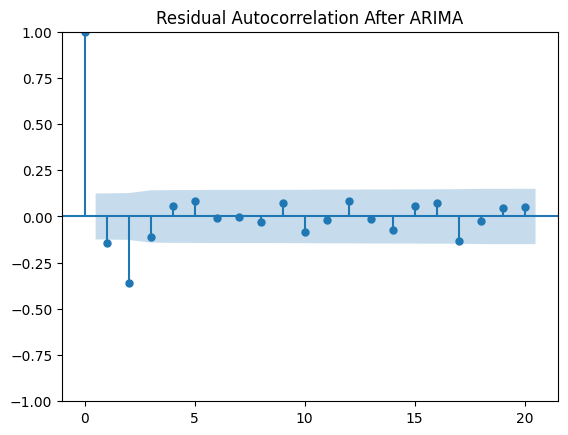

In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order p=1, d=1, q=0 to capture autocorrelation and differencing)
model = ARIMA(nvidia['Daily Returns'], order=(1, 1, 0))
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())

# Plotting the residuals of the ARIMA model to check for autocorrelation
plot_acf(arima_result.resid, lags=20, title="Residual Autocorrelation After ARIMA")
plt.show()